## Cohort Analysis Project: Boosting Customer Retention & Marketing ROI

In this project, I used **Cohort Analysis** to get a detailed look at how customers behave. By grouping customers into cohorts based on their purchase history, I was able to pinpoint critical opportunities to **improve customer retention** and **optimize marketing strategies**. The insights gained from this analysis allowed me to develop targeted strategies that enhanced customer engagement and significantly boosted the effectiveness of marketing campaigns.

In [38]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [39]:
# Loading of file into Data variable, and viewing the first 5 rows
data= pd.read_csv(r'C:\Users\user\Desktop\OTM\cohort analysis\Dataset_ecommerce.csv')

data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [40]:
#display an overall descriptive stats of the columns
data.describe(include= 'all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


When handling the missing values in the customer ID column, I chose to drop them. This was because there was no reliable method to generate or impute these missing IDs, and the number of affected rows was small enough that it wouldn't significantly impact our analysis.

In [41]:
#checking for missing value
data.isna().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [42]:
#droping missing  
data.dropna(inplace=True)

In [43]:
data.isna().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [44]:
#check for more info from df
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [45]:
#convert invoice date to datetime
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


## Exploratory data analysis


In [46]:
#Analysis by country
qty_by_country= data.groupby(['Country'])['Quantity'].sum().reset_index()
qty_by_country= qty_by_country.sort_values(['Quantity'], ascending= False).reset_index()
qty_by_country.head()

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206


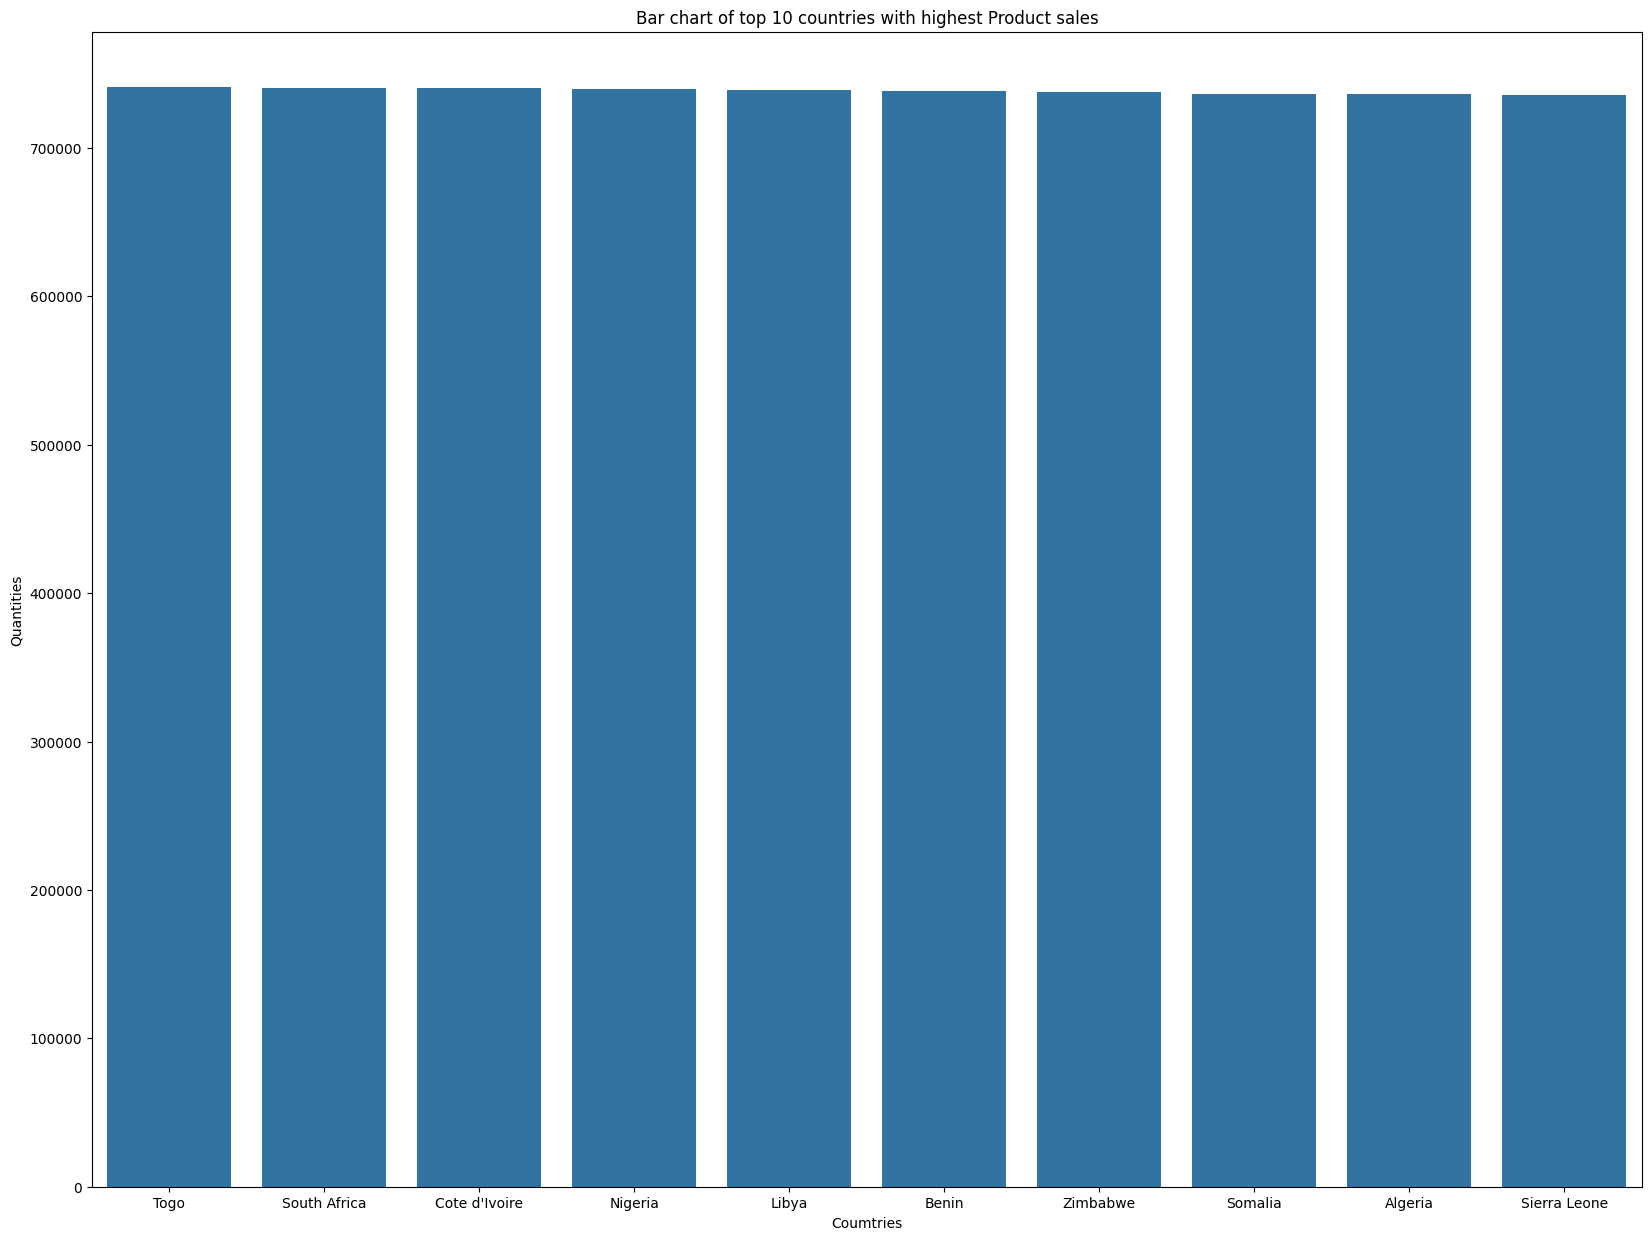

In [47]:
#visualize top 10 countries with most product sold
top_10_country= qty_by_country.head(10)


#to set size
plt.figure(figsize= (20,15))

#barplot of Quantity vs Country
ax= sns.barplot(x= 'Country', y= 'Quantity', data= top_10_country)

#Labels
plt.xlabel('Coumtries')
plt.ylabel('Quantities')
plt.title('Bar chart of top 10 countries with highest Product sales' )

plt.show()

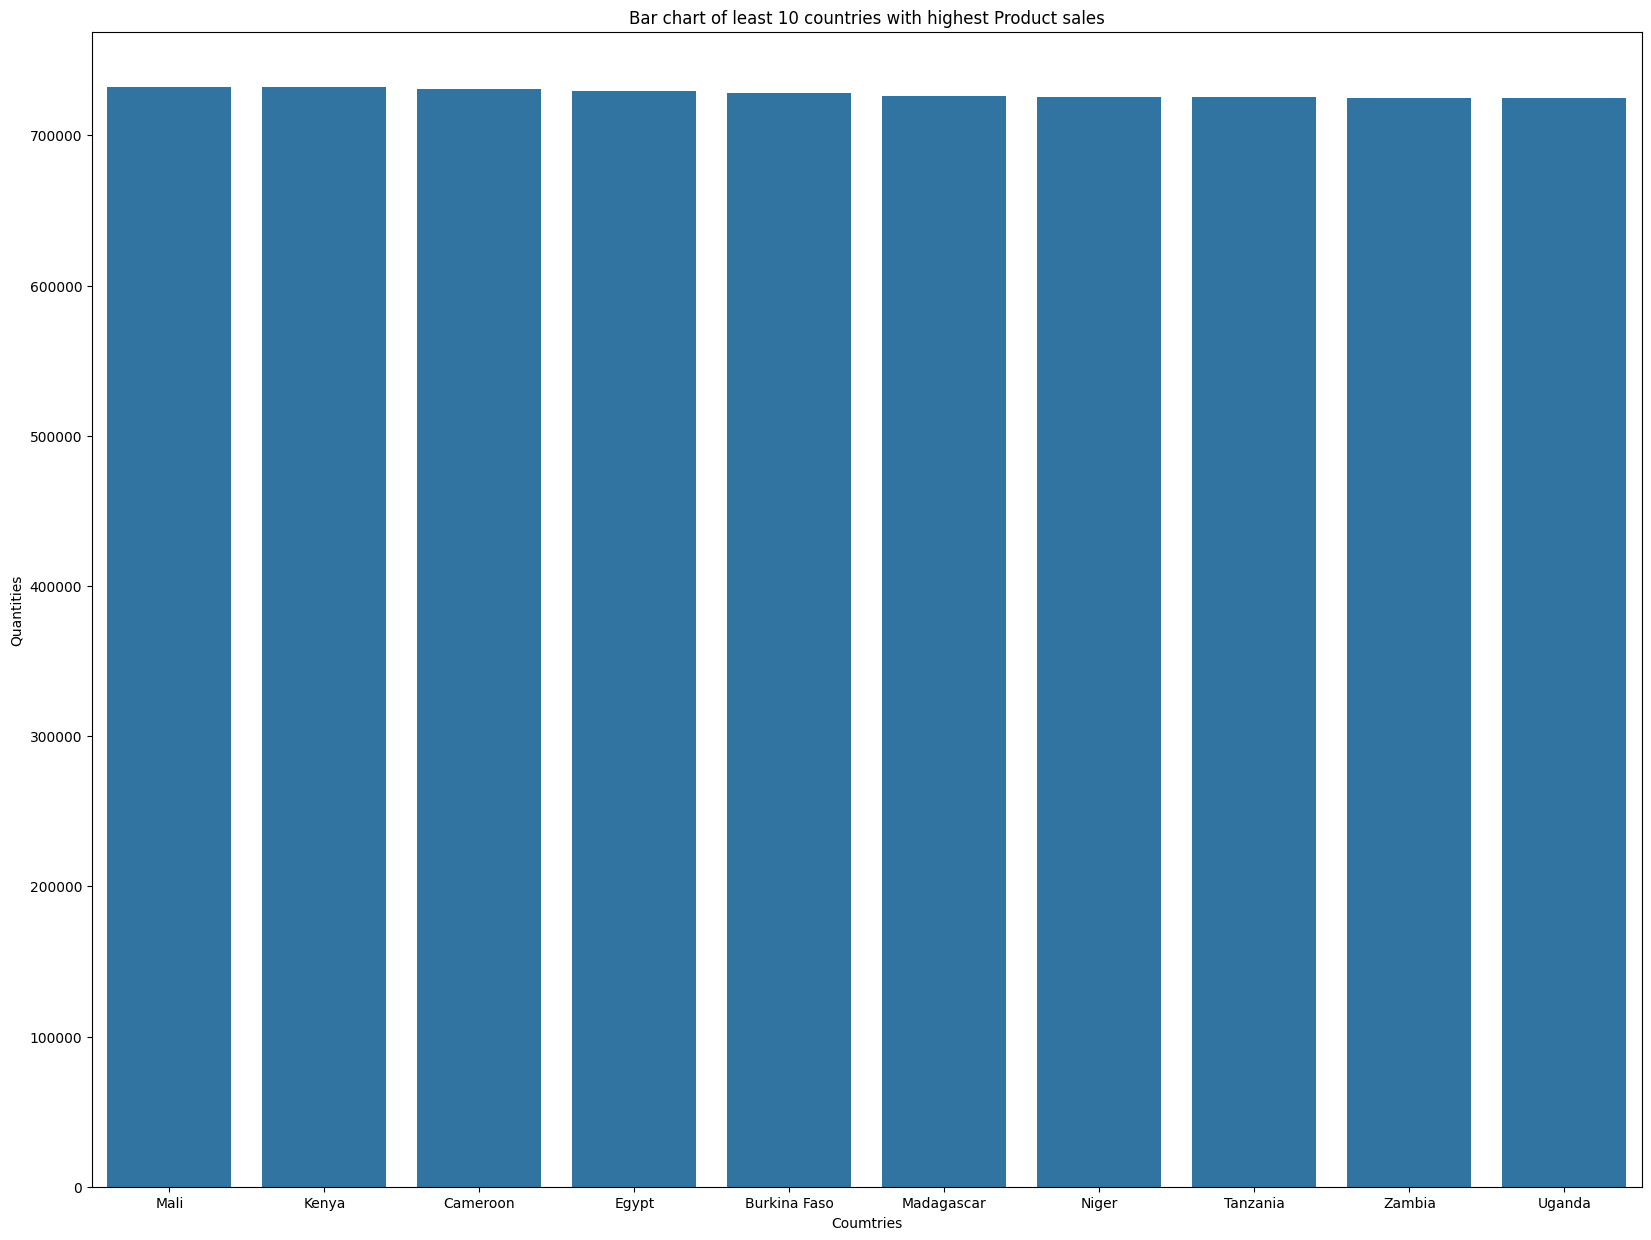

In [48]:
#visualize least 10 countries with most product sold
least_10_country= qty_by_country.tail(10)


#to set size
plt.figure(figsize= (20,15))

#barplot of Quantity vs Country
ax= sns.barplot(x= 'Country', y= 'Quantity', data=least_10_country)

#Labels
plt.xlabel('Coumtries')
plt.ylabel('Quantities')
plt.title('Bar chart of least 10 countries with highest Product sales' )

plt.show()

In [49]:
# Analysis of countries and number of customers
country_to_customer= data.groupby(['Country'])['CustomerID'].nunique().reset_index().sort_values('CustomerID', ascending= False).reset_index()
country_to_customer.head()

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049


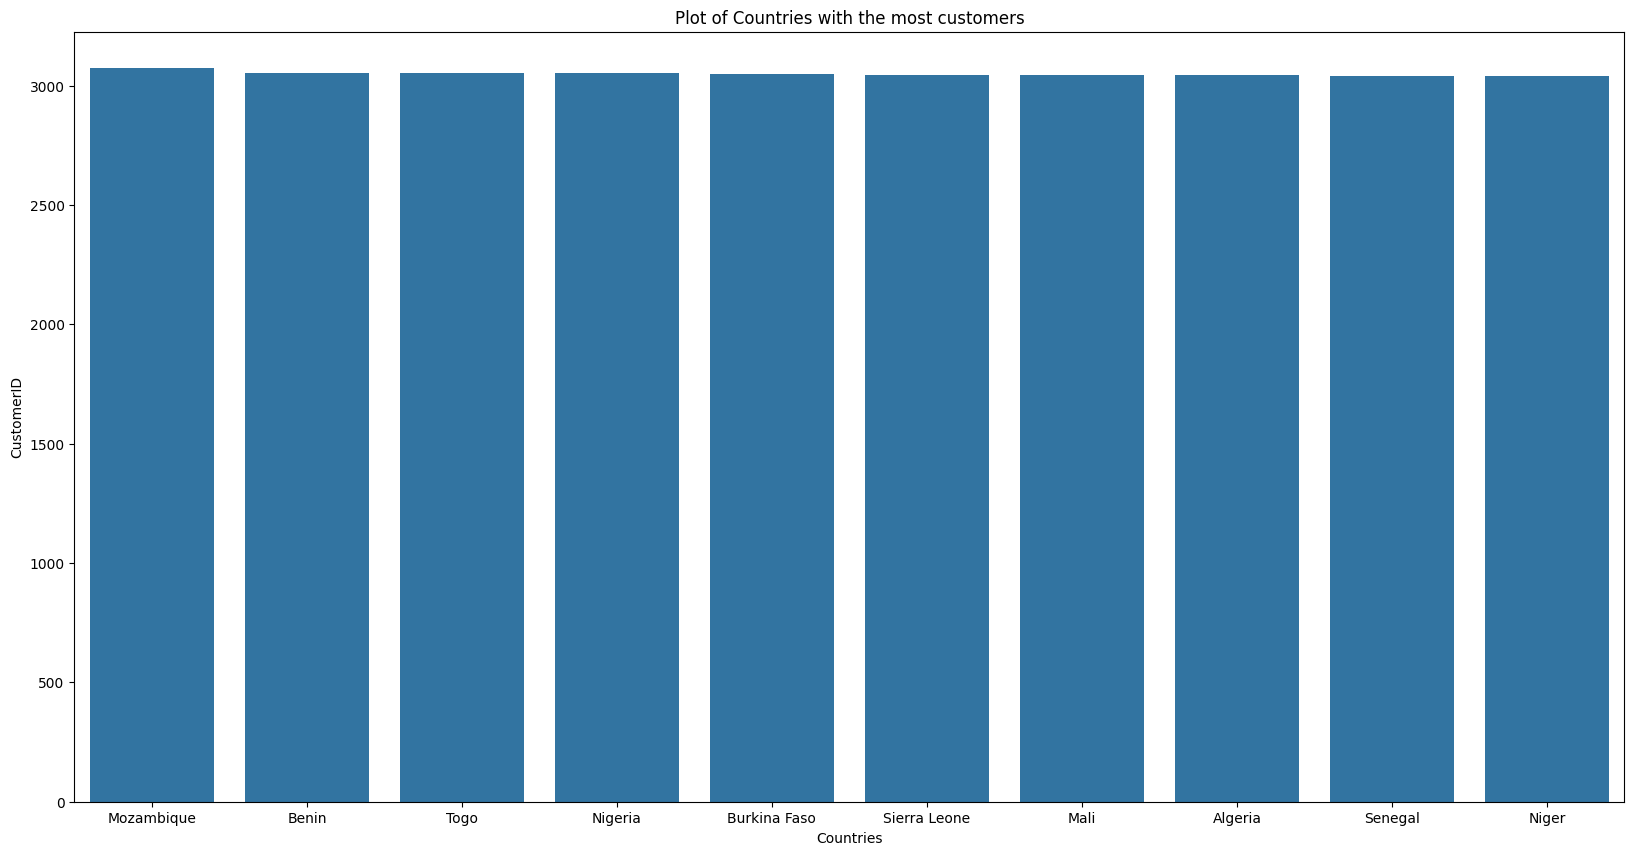

In [50]:
#visualize the plot of top 10 countries with most number of customers
top_10_country_to_cust= country_to_customer.head(10)

plt.figure(figsize=(20,10))
sns.barplot(x='Country', y= 'CustomerID', data= top_10_country_to_cust)

plt.xlabel('Countries')
plt.ylabel('CustomerID')
plt.title('Plot of Countries with the most customers')
plt.show()

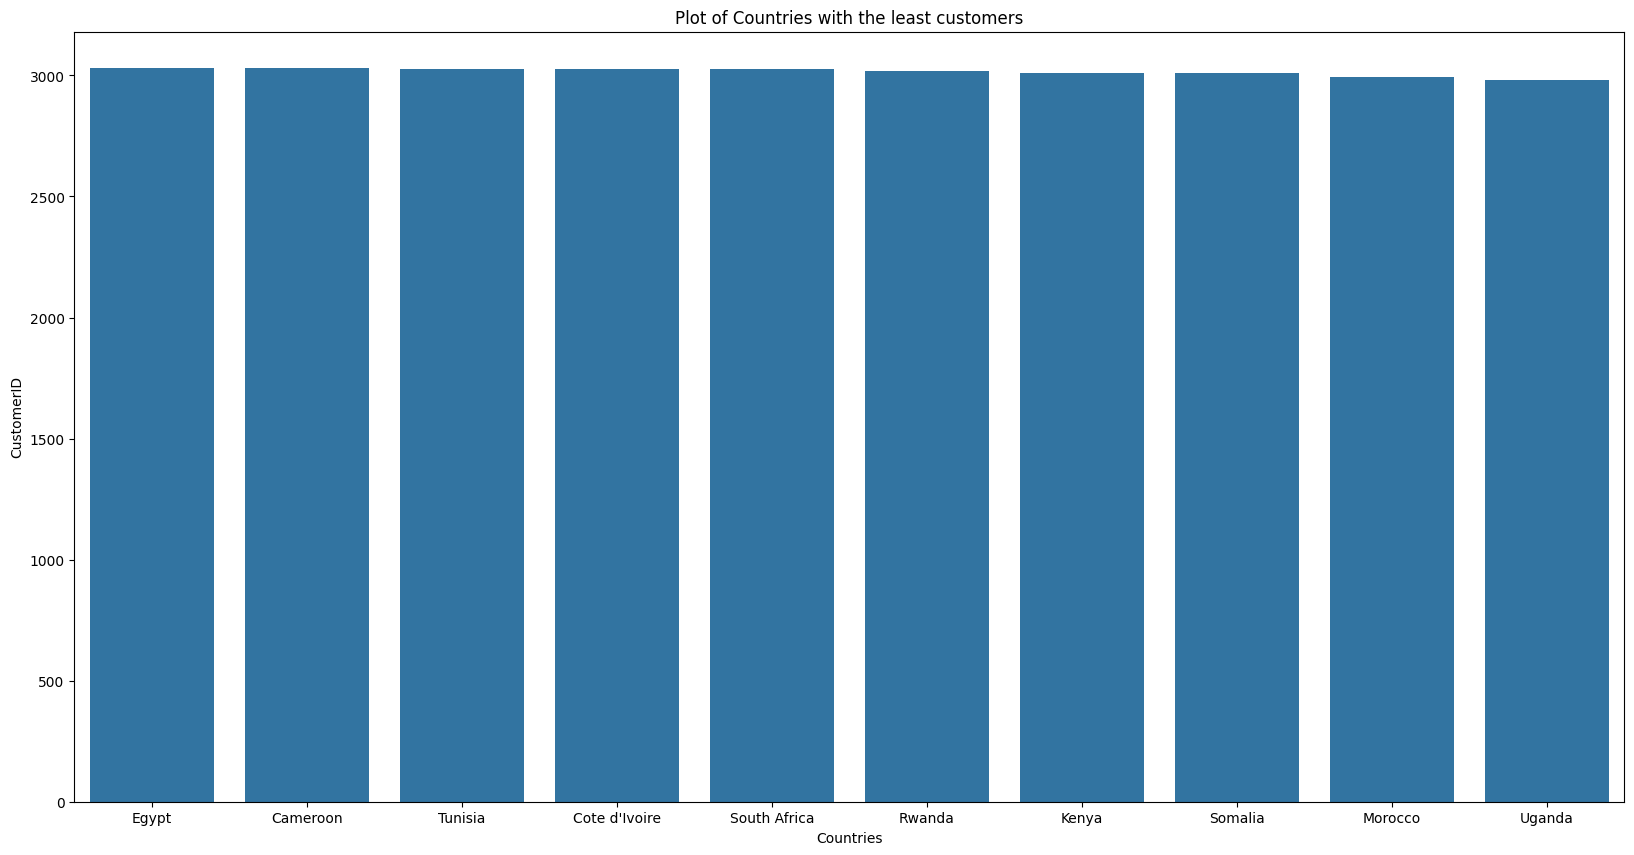

In [51]:
#visualize the plot of least 10 countries with most number of customers
least_10_country_to_customer= country_to_customer.tail(10)

plt.figure(figsize=(20,10))
sns.barplot(x='Country', y= 'CustomerID', data= least_10_country_to_customer)

plt.xlabel('Countries')
plt.ylabel('CustomerID')
plt.title('Plot of Countries with the least customers')
plt.show()

**Sales trend visualization**

In [56]:
monthly_sales= data.groupby(data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

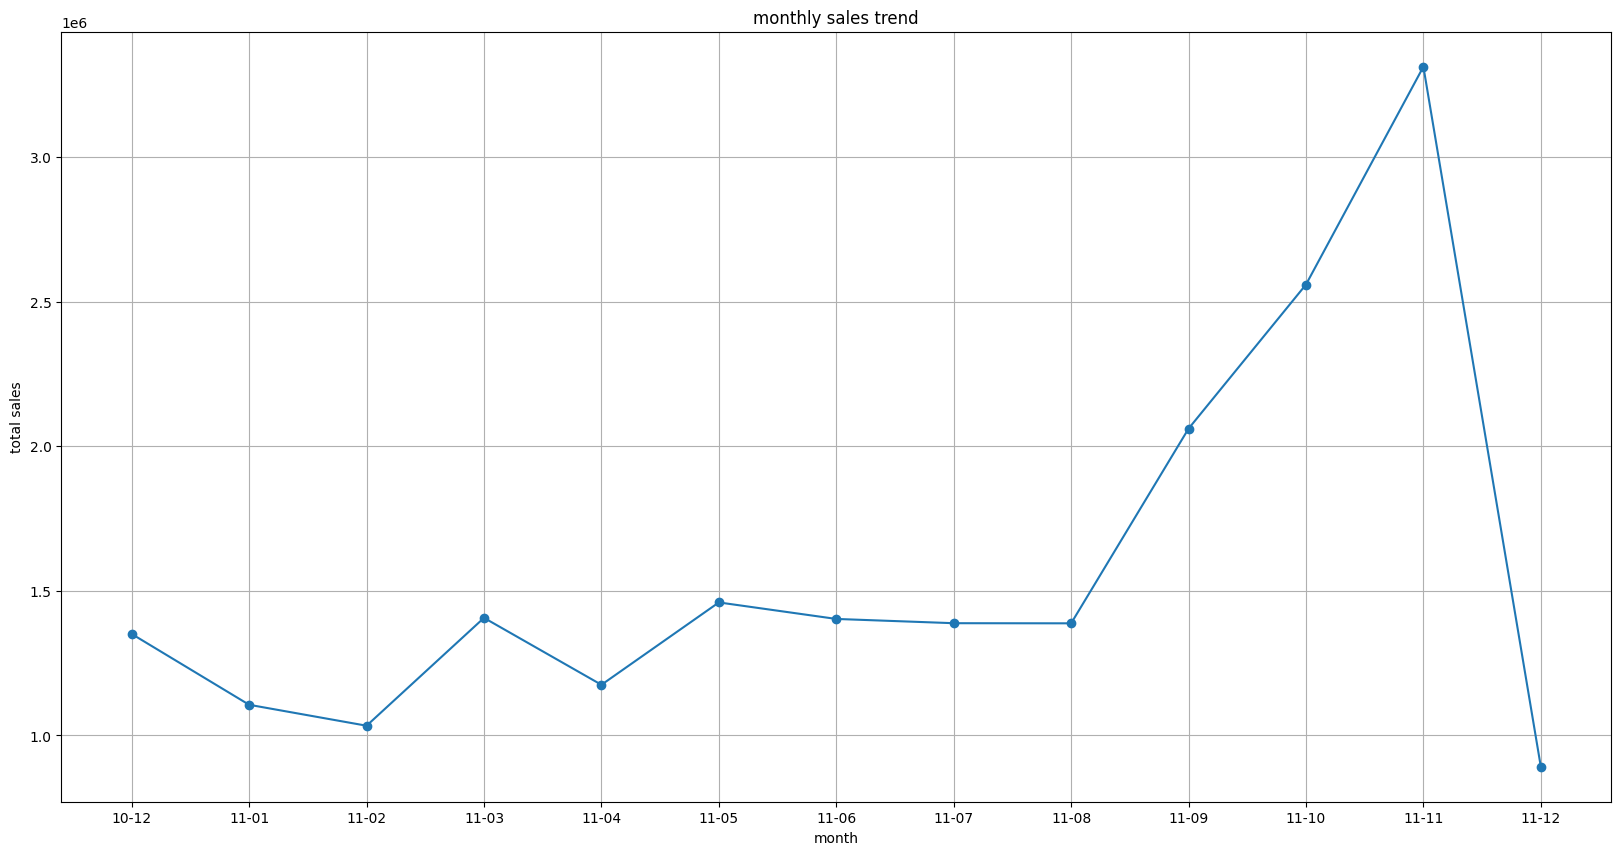

In [57]:
#create a line plot
plt.figure(figsize= (20,10))
plt.plot(monthly_sales.index.strftime('%y-%m'), monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('month')
plt.ylabel('total sales')
plt.title('monthly sales trend')
plt.grid(True)
plt.show()

**Cohort Analysis**

Feature engineering


In [58]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [59]:
# Creating a function that extract the year and month of every data input
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [60]:
data['InvoiceDate']= data['InvoiceDate'].apply(get_month)
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [62]:
# Creating a function that groups the first customer purchase date into a cohort 
def get_cohort_date(df):
    df['cohort date']= df.groupby("CustomerID")['InvoiceDate'].transform('min')
    return df['cohort date']

In [63]:
data['cohort date']= get_cohort_date(data)
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01


**Cohort Index**

Cohort index is the lenght of time between the first purchase and current purchase in review

In [66]:
# Defining a function that extract the month and year of each date
def get_year_month(data, col):
    month= data[col].dt.month
    year= data[col].dt.year
    return month, year

In [65]:
#Applying the get_year_month function on the 'cohort_date' column
first_month, first_year= get_year_month(data, 'cohort date')

#Applying the get_year_month function on the 'InvoiceDate' column
current_month, current_year= get_year_month(data, 'InvoiceDate')


In [67]:
#Defining a function that create the cohort index feature
def create_cohort_index(first_month, first_year,current_month,current_year):
    year_diff= current_year- first_year
    month_diff= current_month-first_month
    index= year_diff *12 + month_diff + 1
    return index

In [69]:
#Applying the create_cohort_index function
data['cohort_index']= create_cohort_index(first_month, first_year,current_month,current_year)
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1


**Cohort table**


In [71]:
cohort_info= data.groupby(['cohort date', 'cohort_index'])['CustomerID'].nunique().reset_index()
cohort_info.rename(columns= {'CustomerID': 'Number of customers'}, inplace= True)
cohort_info.head(10)

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
5,2010-12-01,6,376
6,2010-12-01,7,360
7,2010-12-01,8,336
8,2010-12-01,9,336
9,2010-12-01,10,374


In [73]:
cohort_table= cohort_info.pivot(index= 'cohort date', columns= ['cohort_index'], values= 'Number of customers')
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table.head(10)

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


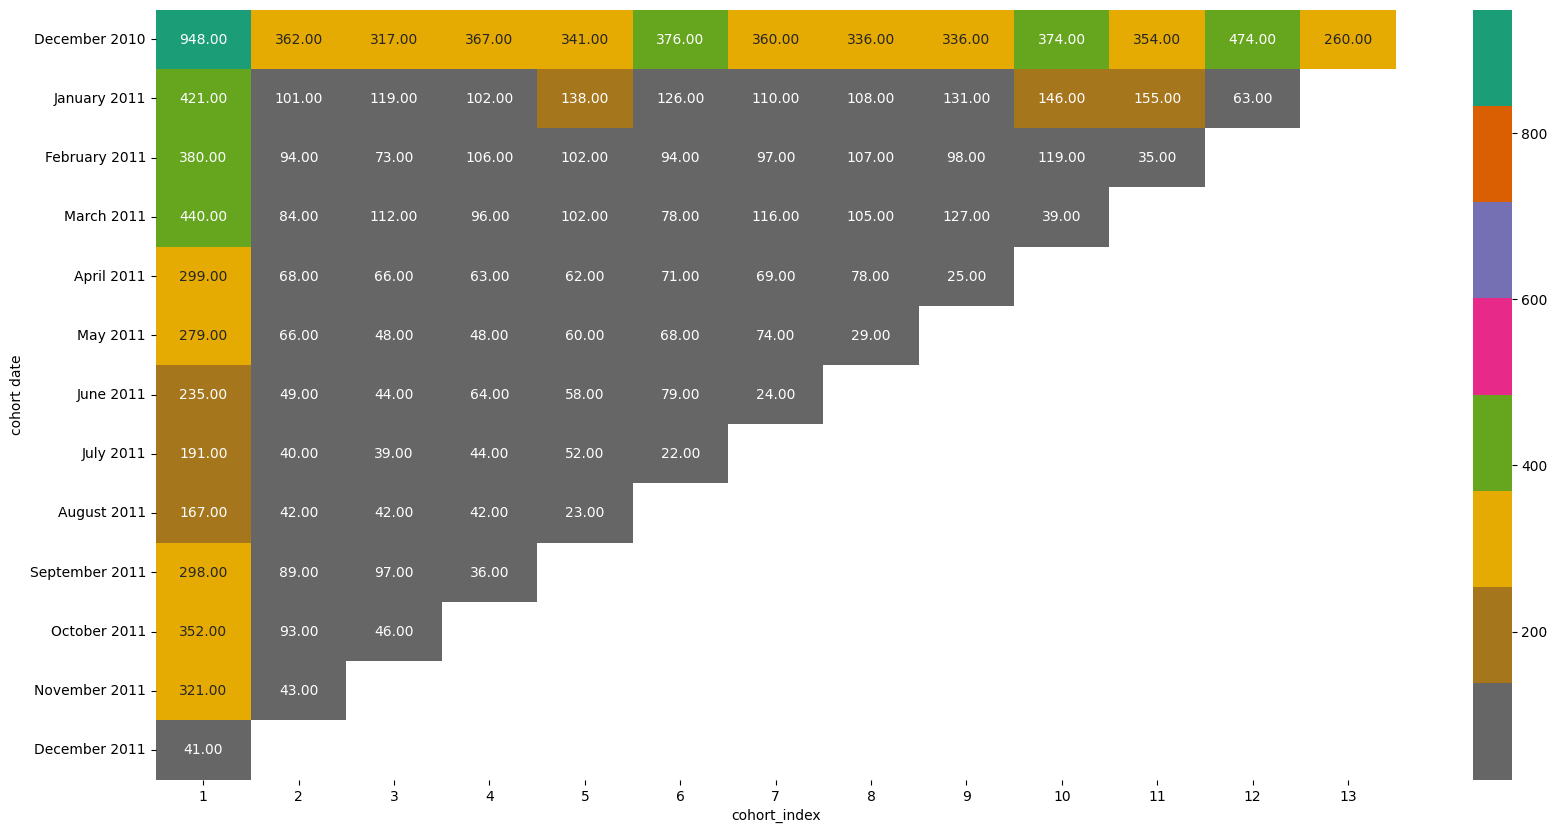

In [77]:
plt.figure(figsize= (20, 10))
sns.heatmap(cohort_table, annot= True, cmap= 'Dark2_r', fmt='.2f')
plt.show()

In [74]:
#To get the table in percentage
new_cohort_table= cohort_table.divide(cohort_table.iloc[:,0], axis=0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


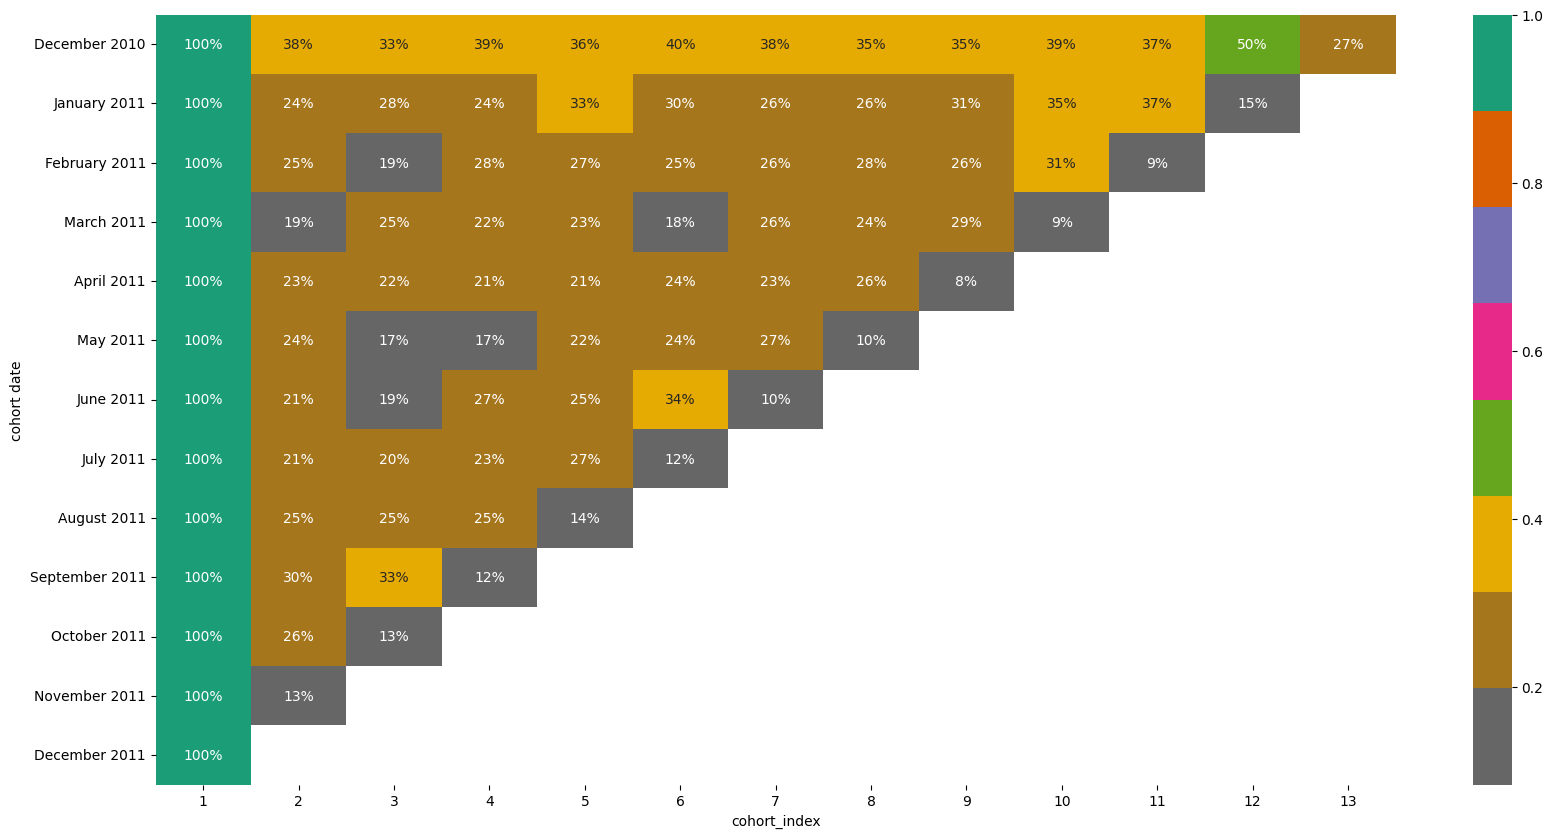

In [ ]:
#Same graph as the last graph but in
plt.figure(figsize= (20, 10))
sns.heatmap(new_cohort_table, annot= True, cmap= 'Dark2_r', fmt='.0%')
plt.show()

In [78]:
#Quantity bought
quantity_bought= data.groupby(['cohort date', 'cohort_index'])['Quantity'].sum().reset_index()
quantity_bought

,cohort date,cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [79]:
quantity_table= quantity_bought.pivot(index='cohort date', columns= ['cohort_index'], values= 'Quantity')
quantity_table.index= quantity_table.index.strftime('%B %Y')
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


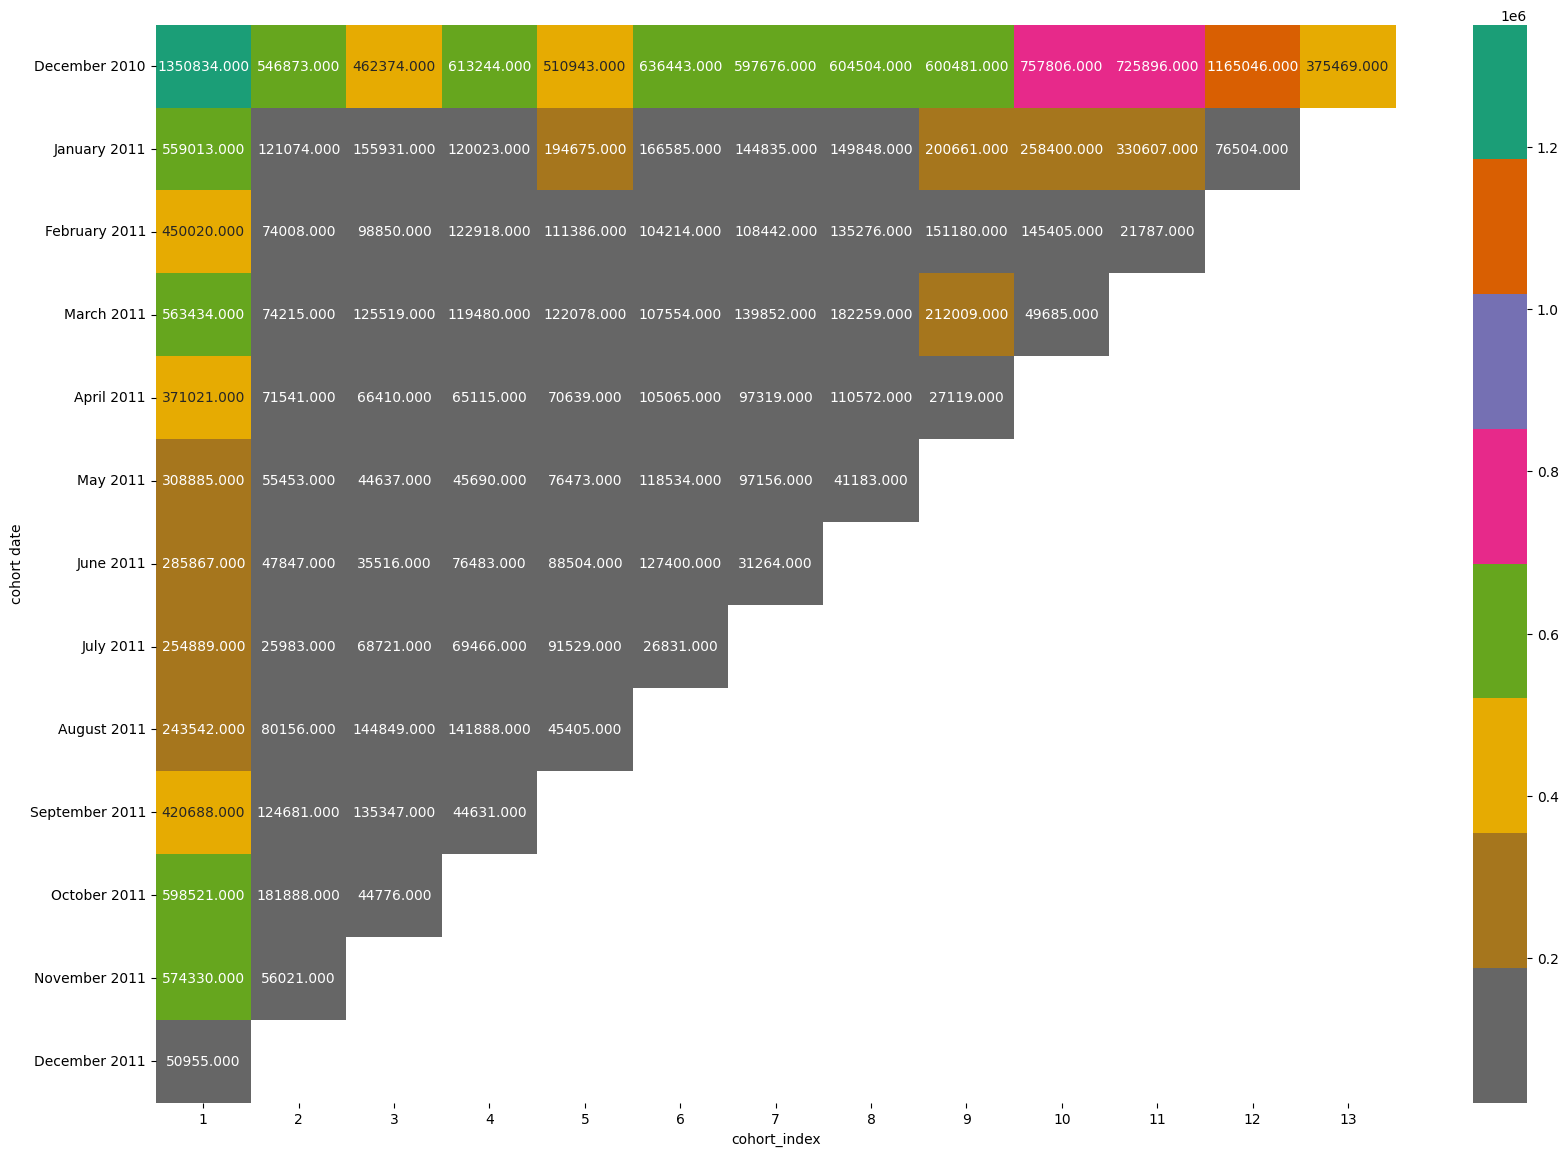

In [80]:
plt.figure(figsize= (20, 14))
sns.heatmap(quantity_table, annot= True, cmap= 'Dark2_r', fmt='.3f')
plt.show()